# h5netcdf data and xarray
an example of accessing / cleaning data stored in h5netcdf format with xarray

- data here is a geocoded unwrapped interferogram from a pair of Sentinel1 images accessed from ASF Vertex here: 
S1-GUNW-D-R-007-tops-20220602_20220521-043043-00022E_00042N-PP-9f71-v2_0_5 </br>
https://search.asf.alaska.edu/#/?zoom=3.000&center=31.783,13.898&dataset=SENTINEL-1%20INTERFEROGRAM%20(BETA)&resultsLoaded=true&granule=S1-GUNW-D-R-007-tops-20220602_20220521-043043-00022E_00042N-PP-9f71-v2_0_5-amplitude


In [1]:
import os, sys
#import h5netcdf
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import h5py

## Importing data

Let's use `xarray` to read in the S1 data as an `xarray.Dataset`

In [2]:
fpath = 'S1-GUNW-D-R-007-tops-20220602_20210625-043224-00021E_00036N-PP-dd9a-v2_0_5.nc'

In [3]:
ds1 = xr.open_dataset(fpath)
ds1

<xarray.Dataset>
Dimensions:             (wkt_count: 1)
Dimensions without coordinates: wkt_count
Data variables:
    productBoundingBox  (wkt_count) |S451 ...
    crs_polygon         int32 ...
Attributes:
    product_type:        UNW GEO IFG
    Conventions:         CF-1.6
    title:               ARIA standard product UNW GEO IFG
    version:             1b
    author:              David Bekaert, Charlie Marshak, Simran Sangha, Joe K...
    institution:         Jet Propulsion Laboratory
    references:          https://aria.jpl.nasa.gov/
    ogr_geometry_field:  productBoundingBox
    ogr_layer_name:      productBoundingBox
    ogr_layer_type:      POLYGON
    source:              Contains modified Copernicus Sentinel data processed...

This show's us some information, but doesn't contain all of the data that we're expecting from this file. Let's take a look at how we can see the structure and contents of the hdf5 file

In [4]:
#help here from: https://www.youtube.com/watch?v=oWR7--o4no8
with h5py.File(fpath, 'r') as hdf:
    base_items = list(hdf.items())
    for item in range(len(base_items)):
        print('items in base directory: ', base_items[item])
        print('')

items in base directory:  ('crs_polygon', <HDF5 dataset "crs_polygon": shape (), type "<i4">)

items in base directory:  ('matchup', <HDF5 dataset "matchup": shape (0,), type ">f4">)

items in base directory:  ('productBoundingBox', <HDF5 dataset "productBoundingBox": shape (1, 451), type "|S1">)

items in base directory:  ('science', <HDF5 group "/science" (2 members)>)

items in base directory:  ('wkt_count', <HDF5 dataset "wkt_count": shape (1,), type ">f4">)

items in base directory:  ('wkt_length', <HDF5 dataset "wkt_length": shape (451,), type ">f4">)



Trying to explore groups/ what they contain a bit more here 

In [5]:
print(base_items[0])
print(type(base_items[0]))
print(base_items[0][1])

('crs_polygon', <Closed HDF5 dataset>)
<class 'tuple'>
<Closed HDF5 dataset>


In [6]:
#how to see the 2 members of the science group? 
type(base_items[3])
base_items[3][1]

<Closed HDF5 group>

In [7]:
with h5py.File(fpath, 'r') as hdf:

    G1 = hdf.get('science')
    G1_items = list(G1.items())
    print('items in group1: ', G1_items)
    print(len(G1_items))
    print(G1_items[0])
    print(G1_items[0][0])
    print(G1_items[0][1])
    print(type(G1_items[0][1]))
    
    science_items = list(G1.get('grids').items())
    #list(G1_items[0])
    print(science_items)




items in group1:  [('grids', <HDF5 group "/science/grids" (3 members)>), ('radarMetaData', <HDF5 group "/science/radarMetaData" (15 members)>)]
2
('grids', <HDF5 group "/science/grids" (3 members)>)
grids
<HDF5 group "/science/grids" (3 members)>
<class 'h5py._hl.group.Group'>
[('data', <HDF5 group "/science/grids/data" (7 members)>), ('imagingGeometry', <HDF5 group "/science/grids/imagingGeometry" (9 members)>), ('corrections', <HDF5 group "/science/grids/corrections" (2 members)>)]


## Contents of 'science' group:
- grids (3 members)
- radar metadata (15 members)

### contents of science/grids: 

- data (/science/grids/data) (7 members)
- imagingGeometry (9 members)
- corrections (2 members)


### Reading in data from science group
Let's try opening the data group as a xr.Dataset:

In [8]:
ds1 = xr.open_dataset(fpath,
                     group = '/science/grids/data', engine='h5netcdf',
                     chunks = 'auto')

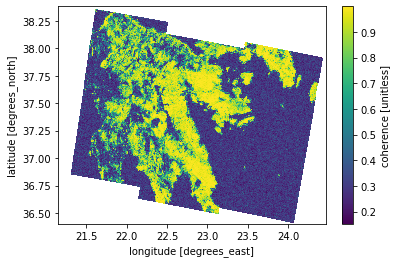

In [9]:
ds1.coherence.plot()

going back and checking out other groups in object

help from this youtube video: https://www.youtube.com/watch?v=oWR7--o4no8

In [10]:
with h5py.File(fpath, 'r') as hdf:
    base_items = list(hdf.items())
    for item in range(len(base_items)):
        print('items in base directory: ', base_items[item])
        print('')
    G1 = hdf.get('science')
    G1_items = list(G1.items())
    print('items in group1: ', G1_items)

items in base directory:  ('crs_polygon', <HDF5 dataset "crs_polygon": shape (), type "<i4">)

items in base directory:  ('matchup', <HDF5 dataset "matchup": shape (0,), type ">f4">)

items in base directory:  ('productBoundingBox', <HDF5 dataset "productBoundingBox": shape (1, 451), type "|S1">)

items in base directory:  ('science', <HDF5 group "/science" (2 members)>)

items in base directory:  ('wkt_count', <HDF5 dataset "wkt_count": shape (1,), type ">f4">)

items in base directory:  ('wkt_length', <HDF5 dataset "wkt_length": shape (451,), type ">f4">)

items in group1:  [('grids', <HDF5 group "/science/grids" (3 members)>), ('radarMetaData', <HDF5 group "/science/radarMetaData" (15 members)>)]
